In [2]:
import lyricsgenius
from bs4 import BeautifulSoup
from urllib import request
import nltk
from nltk.corpus import words
import requests
import pandas as pd
from typing import List
import re
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#from scrape_and_clean import get_lyrics_from_genius, clean_lyrics, is_english, create_genre_df


In [3]:
# Replace 'your_client_id' and 'your_client_secret' with your actual Client ID and Client Secret
client_id = "Add your client id here"
client_secret = "Add your client secret here"

# Setup authentication
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
def fetch_songs_by_genre(genre, song_count):
    """Fetches songs from Spotify based on genre

    Args:
        genre (str): Genre to fetch songs for
        song_count (int): Number of songs to fetch

    Returns:
        List[Dict]: List of dictionaries containing song information
    """
    songs = []
    offset = 0
    limit = 50  # Max limit per API call allowed by Spotify
    seen_songs = set()  # Set to keep track of artist-track combinations

    try:
        while len(songs) < song_count and offset <= 1000:  # Adjusting the condition to avoid bad offsets
            query = f"genre:{genre}"
            results = sp.search(query, type='track', limit=limit, offset=offset)
            tracks = results['tracks']['items']

            for track in tracks:
                artist_name = track['artists'][0]['name']
                track_name = track['name']
                unique_key = (artist_name.lower(), track_name.lower())  # Create a unique key for each song
                
                if unique_key not in seen_songs:  # Check if this song has already been added
                    if len(songs) < song_count:
                        song_info = {
                            'track_name': track_name,
                            'artist': artist_name,
                            'track_id': track['id'],
                            'genre': genre
                        }
                        songs.append(song_info)
                        seen_songs.add(unique_key)  # Add to set to track we've added this song
                    else:
                        break

            offset += limit
    except spotipy.SpotifyException as e:
        print(f"Spotify API Error: {e}")

    return songs

In [53]:
genres = ['rock', 'pop', 'rap'] #'country'

songs_dataset = []

for genre in genres:
    songs = fetch_songs_by_genre(genre, 1000)
    songs_dataset.extend(songs)

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'genre:rock', 'limit': 50, 'offset': 1000, 'type': 'track', 'market': None} returned 400 due to Bad request.


Spotify API Error: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=genre%3Arock&limit=50&offset=1000&type=track:
 Bad request., reason: None


HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'genre:pop', 'limit': 50, 'offset': 1000, 'type': 'track', 'market': None} returned 400 due to Bad request.


Spotify API Error: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=genre%3Apop&limit=50&offset=1000&type=track:
 Bad request., reason: None


HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'genre:rap', 'limit': 50, 'offset': 1000, 'type': 'track', 'market': None} returned 400 due to Bad request.


Spotify API Error: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=genre%3Arap&limit=50&offset=1000&type=track:
 Bad request., reason: None


In [55]:
# Create DataFrame
spotipy_df = pd.DataFrame(songs_dataset)

# Rename the 'genre' column to 'track_genre'
spotipy_df = spotipy_df.rename(columns={'genre': 'track_genre', 'artist': 'artists'})

# Save to CSV
spotipy_df.to_csv('spotify_songs_dataset.csv', index=False)

In [14]:
#API key for Genius
genius = lyricsgenius.Genius("Add your genius api key here")

In [6]:
# Set Genius API parameters
genius.verbose = True # Turn off status messages
genius.skip_non_songs = False # Include hits thought to be non-songs (e.g. track lists)
genius.excluded_terms = ["(Remix)", "(Live)"] # Exclude songs with these words in their title

In [17]:
def print_first_five_lines(lyrics):
    lines = lyrics.split('\n')  # Split the lyrics into lines
    first_three_lines = lines[:5]  # Get the first three lines
    for line in first_three_lines:
        print(line)  # Print each of the first three lines


In [18]:
pinball_wizard = genius.search_song("Jump", "Van Halen")
print_first_five_lines(pinball_wizard.lyrics)

Searching for "Jump" by Van Halen...
Done.
59 ContributorsJump Lyrics[Intro]
Ow!

[Verse 1]
I get up, and nothing gets me down


In [19]:
reservoir_dogs = genius.search_song("God Only Knows - Mono / 1997 Remastered", 
                                    "The Beach Boys")
print_first_five_lines(reservoir_dogs.lyrics)

Searching for "God Only Knows - Mono / 1997 Remastered" by The Beach Boys...
Done.
3 ContributorsReservoir Dogs LyricsQuentin Tarantino's

R E S E R V O I R   D O G S




In [20]:
paint_it_black = genius.search_song("Paint It Black", 
                                    "The Rolling Stones")
print_first_five_lines(paint_it_black.lyrics)


Searching for "Paint It Black" by The Rolling Stones...
Done.
150 ContributorsTranslationsEspañolPaint It, Black Lyrics[Instrumental Intro]

[Verse 1]
I see a red door and I want it painted black
No colours anymore, I want them to turn black


In [7]:
# Reading in kaggle dataset
spotifydf = pd.read_csv('/Users/jordanbruce/Desktop/CADS/Spring_2024/CS 632/Song-Lyrics-NLP/src/Spotify.csv')

# Columns based on which to identify duplicates
columns_to_check = ['artists', 'track_name', 'track_genre']

# Remove duplicates, keep the first occurrence
spotifydf = spotifydf.drop_duplicates(subset=columns_to_check, keep='first')


In [8]:
spotifydf.size

2104410

In [9]:
#find all unique values for track_genre
spotifydf['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [10]:
def get_genre_by_track_and_artist(track_name, artist_name):
    """Get the genre of a song based on the track name and artist name

    Args:
        track_name (str): Name of the track
        artist_name (str): Name of the artist

    Returns:
        str: Genre of the song
    """
    # Filter the DataFrame for the track and artist (case insensitive)
    track_row = spotifydf[
        (spotifydf['track_name'].str.lower() == track_name.lower()) & 
        (spotifydf['artists'].str.lower().str.contains(artist_name.lower()))
    ]

    # Check if the song is in the dataset and retrieve the genre
    if not track_row.empty:
        genre = track_row['track_genre'].iloc[0]
        return genre
    else:
        return "Genre not found"

# Example usage
track_to_search = "without me"
artist_to_search = "eminem"  # Replace with the correct artist name
genre = get_genre_by_track_and_artist(track_to_search, artist_to_search)
print(f"The genre of '{track_to_search}' by {artist_to_search} is: {genre}")

The genre of 'without me' by eminem is: hip-hop


In [39]:
def get_lyrics_from_genius(row):
    """Fetches the lyrics of a song from Genius

    Args:
        row (pd.Series): Row containing the song information

    Returns:
        str: Lyrics of the song
    """
    try:
        song = genius.search_song(row['track_name'], row['artists'])
        return song.lyrics if song else "Lyrics not found"
    except Exception as e:
        print(f"Error occurred while fetching lyrics: {e}")
        return "Lyrics not found"

def clean_lyrics(lyrics):
    """Cleans the lyrics by removing unwanted sections
    1. Bracketed sections (e.g., [Chorus], [Verse 1], etc.)
    2. Trailing 'Embed' and any numbers directly before it

    Args:
        lyrics (str): Lyrics to clean

    Returns:
        str: Cleaned lyrics
    """
    lyrics = re.sub(r'\[.*?\]', '', lyrics)  # Removes any remaining bracketed sections
    # Remove trailing 'Embed' and any numbers directly before it
    lyrics = re.sub(r'\d*Embed$', '', lyrics, flags=re.MULTILINE)
    return lyrics.strip()  # Remove any leading/trailing whitespace

def is_english(lyrics):
    """Checks if the lyrics are in English by comparing the words to the English vocabulary

    Args:
        lyrics (str): Lyrics to check

    Returns:
        bool: True if the lyrics are in English, False otherwise
    """
    # Load list of English words
    english_vocab = set(words.words())
    words_in_lyrics = set(nltk.word_tokenize(lyrics.lower()))  # Tokenize and convert to lower case
    english_words = words_in_lyrics.intersection(english_vocab)
    
    if len(words_in_lyrics) == 0:  # Prevent division by zero
        return False

    # Calculate the percentage of words in the lyrics that are English
    threshold = 0.6  # 90% of the words must be English
    return (len(english_words) / len(words_in_lyrics)) > threshold

def create_genre_df(genres: List[str], sample: int, spotifydf: pd.DataFrame):
    """Create a DataFrame with lyrics for songs from the specified genres
    1. Uses given Spotify DataFrame to fetch songs and their genres
    2. Fetches lyrics for the songs from Genius
    3. Cleans the lyrics and removes non-English songs
    4. Excludes Christmas songs by checking for Christmas keywords in the song title
    5. Returns a DataFrame with the lyrics of the sampled songs


    Args:
        genres (List[str]): List of genres to fetch songs for
        sample (int): Number of songs to fetch for each genre
        spotifydf (pd.DataFrame): DataFrame containing song information

    Returns:
        pd.DataFrame: DataFrame containing the lyrics of the sampled songs
    """
    frames = []
    christmas_keywords = ['christmas', 'jingle', 'rudolph', 'santa', 'snow', 
                          'xmas', 'merry', 'jolly', 'holly', 'noel', 'gift', 
                          'sleigh', 'carol', 'frosty', 'elf', 'reindeer', 
                          'mistletoe', 'presents', 'yuletide', 'december', 
                          'winter', 'holiday', 'navidad', 'feliz',
                          'deck the halls', 'silent night', 'saint nick', 
                          'wonderful time of the year', 'holy night', 
                          'joy to the world', 'drummer boy']
    
    for genre in genres:
        genre_df = spotifydf[spotifydf['track_genre'] == genre].copy()
        
        # Exclude Christmas songs by checking for christmas_keywords in 'track_name'
        genre_df = genre_df[~genre_df['track_name'].str.lower().str.contains('|'.join(christmas_keywords))]
        
        lyrics_df = pd.DataFrame(columns=genre_df.columns)  # Ensure we have the same columns

        while len(lyrics_df) < sample and not genre_df.empty:
            sample_df = genre_df.sample(n=1)
            genre_df = genre_df.drop(sample_df.index)  # Remove sampled song to avoid resampling
            
            sample_df['Lyrics'] = sample_df.apply(get_lyrics_from_genius, axis=1)
            sample_df['Lyrics'] = sample_df['Lyrics'].apply(clean_lyrics)
            
            song_title = sample_df['track_name'].iloc[0].lower()
            if song_title in sample_df['Lyrics'].iloc[0].lower():
                lyrics = sample_df['Lyrics'].iloc[0]
                lyrics_start_index = lyrics.lower().find("lyrics")
                if lyrics_start_index != -1:
                    sample_df['Lyrics'] = lyrics[lyrics_start_index + len("lyrics"):].strip()
                
                # Only append if lyrics were found and the song is in English
                if sample_df['Lyrics'].iloc[0] != "Lyrics not found" and is_english(sample_df['Lyrics'].iloc[0]):
                    lyrics_df = pd.concat([lyrics_df, sample_df])
        
        frames.append(lyrics_df)
        
    return pd.concat(frames, ignore_index=True)

In [ ]:
#note it uses spotipy_df
songs_df = create_genre_df(genres, 200, spotipy_df)

In [59]:
songs_df.shape

(527, 5)

In [60]:
# Count the number of songs per genre
genre_counts = songs_df['track_genre'].value_counts()

old_genre_counts = saved_songs_df['track_genre'].value_counts()
# Print the counts
print(genre_counts)
print(old_genre_counts)

track_genre
rock    200
rap     196
pop     131
Name: count, dtype: int64
track_genre
country    319
rap        242
rock       211
pop        125
Name: count, dtype: int64


In [50]:
# Count the number of songs per genre for the entire DataFrame
genre_counts = spotifydf['track_genre'].value_counts()

# Select counts for specific genres
specific_genre_counts = genre_counts.loc[['rock', 'country', 'pop', 'hip-hop']]

# Print the counts
print(specific_genre_counts)

track_genre
rock       575
country    607
pop        767
hip-hop    733
Name: count, dtype: int64


In [51]:
#sometimes ran multiple times so I would save and combine files
saved_songs_df = songs_df.copy()

In [66]:
df_1 = pd.read_csv("/Users/jordanbruce/Desktop/CADS/Spring_2024/CS 632/Song-Lyrics-NLP/src/songs_lyrics.csv")
df_2 = songs_df
df_3 = saved_songs_df
df_combined = pd.concat([df_1, df_2, df_3], ignore_index=True)

In [67]:
unique_df = df_combined.drop_duplicates()

In [68]:
# Count the number of songs per genre for the entire DataFrame
genre_counts = unique_df['track_genre'].value_counts()

# Select counts for specific genres
specific_genre_counts = genre_counts.loc[['rock', 'country', 'pop', 'rap']]

# Print the counts
print(specific_genre_counts)

track_genre
rock       656
country    619
pop        350
rap        323
Name: count, dtype: int64


In [70]:
unique_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Lyrics
0,91981.0,5ugV3rhvi2h6l52e1cIfLw,3 Doors Down,Fishing Music,Kryptonite,0.0,234626.0,False,0.544,0.848,...,0.0,0.0288,0.00395,0.000052,0.1340,0.489,99.039,4.0,rock,"Well, I took a walk around the world to ease m..."
1,91357.0,5Hroj5K7vLpIG4FNCRIjbP,American Authors,"Oh, What A Life",Best Day Of My Life,79.0,194240.0,False,0.673,0.902,...,1.0,0.0346,0.05910,0.000262,0.0558,0.538,100.012,4.0,rock,"(Woo, oh-oh, oh-oh, oh)\n\n\nI had a dream so ..."
2,91953.0,0z5x3VmmQ7cyTeOP7VAf3T,Arctic Monkeys,The Car,Perfect Sense,40.0,167379.0,False,0.520,0.478,...,1.0,0.0276,0.61000,0.001220,0.1050,0.545,82.932,4.0,rock,"Richard of York, the Executive Branch\nHaving ..."
3,91644.0,4GPQDyw9hC1DiZVh0ouDVL,The Black Keys,OK Boomers - Top Tunes,Keep My Name Outta Your Mouth,0.0,189356.0,False,0.597,0.702,...,1.0,0.0445,0.01970,0.010000,0.1250,0.645,83.507,4.0,rock,Cry to myself and hanging 'round\nThis old ves...
4,91015.0,68EkhVWIeULhHxcbi1QhzK,AJR,OK ORCHESTRA,World's Smallest Violin,80.0,180746.0,True,0.680,0.697,...,1.0,0.0484,0.12100,0.000000,0.6610,0.684,116.033,4.0,rock,My grandpa fought in World War II\nHe was such...


In [71]:
# List of columns to keep
columns_to_keep = ['artists', 'track_name', 'track_genre', 'Lyrics']

# Use list comprehension to create a list of columns to drop
columns_to_drop = [col for col in unique_df.columns if col not in columns_to_keep]

# Drop the columns
final_df = unique_df.drop(columns=columns_to_drop)

In [74]:
final_df = final_df.groupby('track_genre').head(320)

In [81]:
final_df['track_genre'].value_counts()

track_genre
rock       320
pop        320
country    320
rap        320
Name: count, dtype: int64

In [77]:
final_df = final_df[final_df['track_genre'] != 'hip-hop']

In [82]:
#download to csv
final_df.to_csv('Final_Lyrics_Data.csv', index=False)

In [21]:
df = pd.read_csv('/Users/jordanbruce/Desktop/CADS/Spring_2024/CS 632/Song-Lyrics-NLP/src/Final_Lyrics_Data.csv')

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jordanbruce/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, theme, element_text, theme_light


In [24]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(lyrics):
    return sia.polarity_scores(lyrics)['compound']

df['Sentiment'] = df['Lyrics'].apply(get_sentiment)

In [25]:
# Define a function to calculate average words per line
def average_words_per_line(lyrics):
    lines = lyrics.split('\n')  # Split the lyrics into lines
    if len(lines) == 0:
        return 0
    word_counts = [len(line.split()) for line in lines if line.strip() != '']  # List of word counts per line
    return sum(word_counts) / len(word_counts)  # Return average

# Apply the function to create a new column for average words per line
df['Avg_Words_Per_Line'] = df['Lyrics'].apply(average_words_per_line)

In [26]:
agg_df = df.groupby('track_genre').agg({
    'Sentiment': 'mean',
    'Avg_Words_Per_Line': 'mean'
}).reset_index()

/var/folders/d9/0dmxw_j167zfwp75cfng1nkw0000gn/T/ipykernel_22840/2773416366.py:8: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


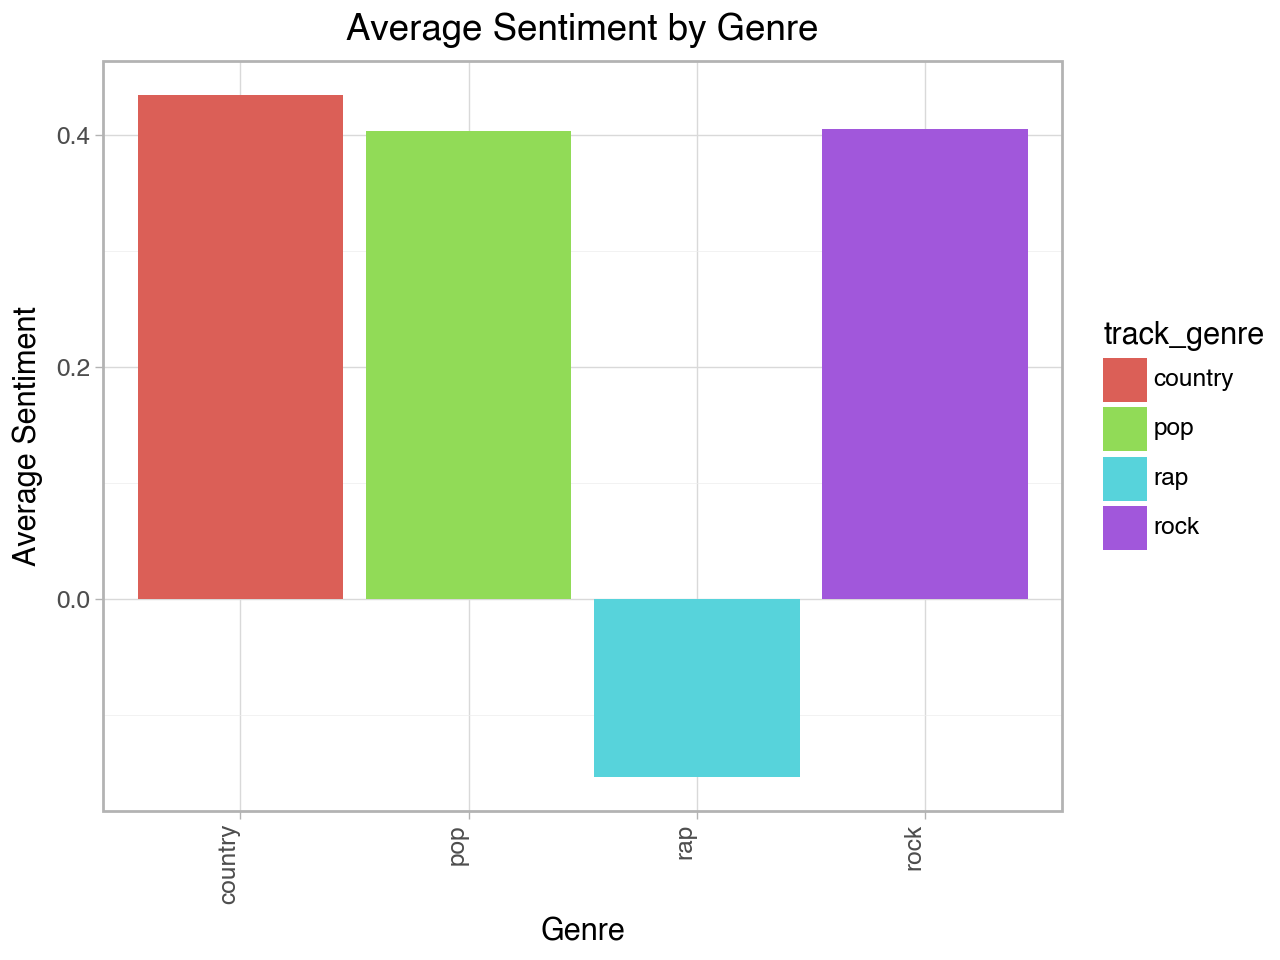

In [27]:
sentiment_plot = (
    ggplot(agg_df, aes(x='track_genre', y='Sentiment', fill='track_genre')) +
    geom_bar(stat='identity') +  # Use identity to tell ggplot these are pre-summarized counts
    labs(title='Average Sentiment by Genre', x='Genre', y='Average Sentiment') +
    theme_light() +
    theme(axis_text_x=element_text(rotation=90, hjust=1))  # Rotate x labels for better visibility
)
print(sentiment_plot)


/var/folders/d9/0dmxw_j167zfwp75cfng1nkw0000gn/T/ipykernel_22840/1128661466.py:9: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


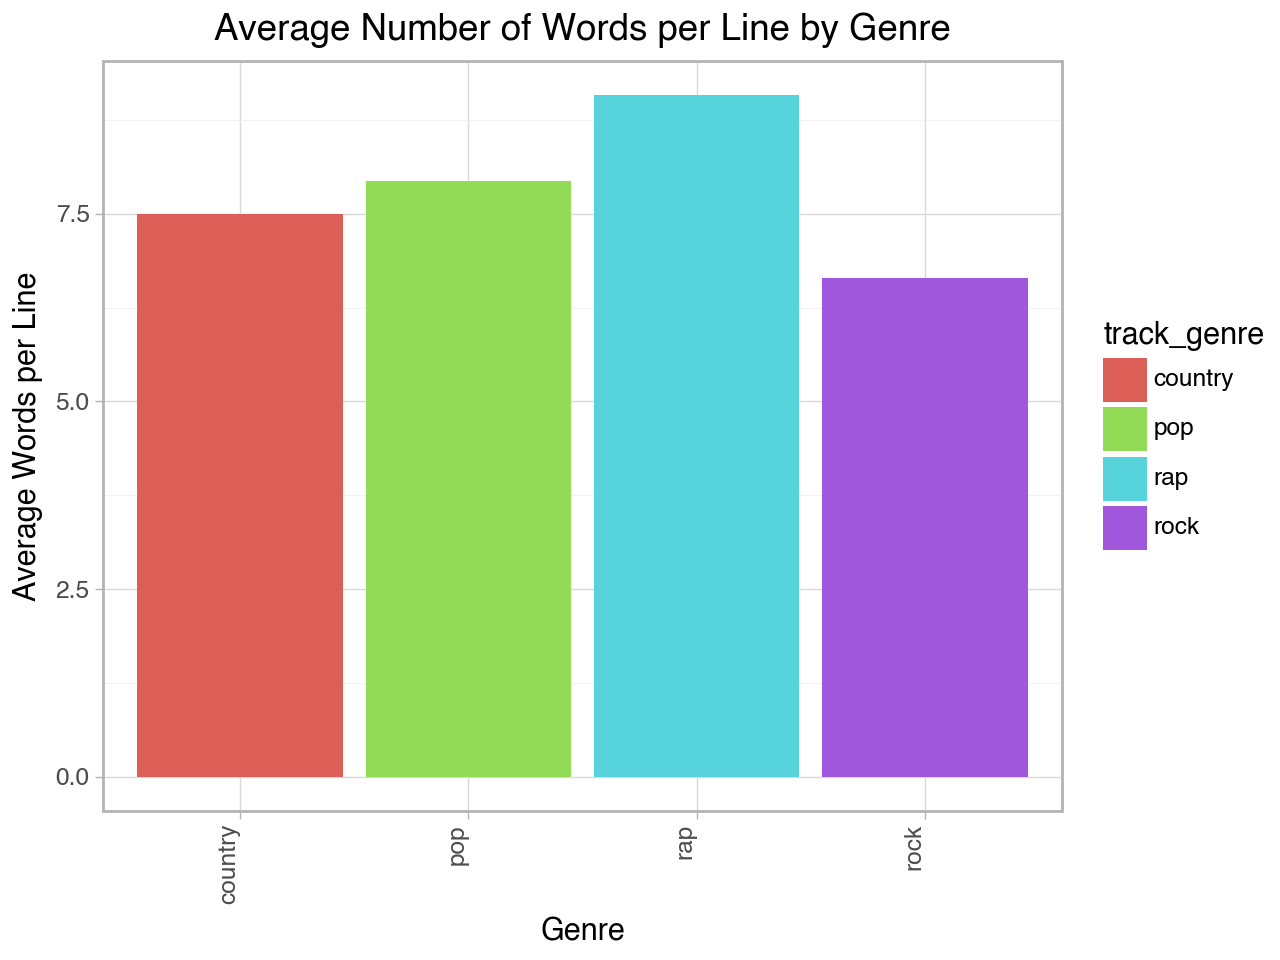

In [28]:
# Bar chart for average words per line by genre
line_length_plot = (
    ggplot(agg_df, aes(x='track_genre', y='Avg_Words_Per_Line', fill='track_genre')) +
    geom_bar(stat='identity') +
    labs(title='Average Number of Words per Line by Genre', x='Genre', y='Average Words per Line') +
    theme_light() +
    theme(axis_text_x=element_text(rotation=90, hjust=1))  # Rotate x labels for better visibility
)
print(line_length_plot)

In [29]:
def uniqueness(lyrics):
    # Split the lyrics into lines
    lines = lyrics.splitlines()
    
    # Remove empty lines
    lines = [line.strip() for line in lines if line.strip() != '']
    
    # Calculate the percentage of unique lines
    unique_lines = set(lines)  # Using a set to store unique lines
    if len(lines) > 0:
        unique_percentage = len(unique_lines) / len(lines)
    else:
        unique_percentage = 0  # Avoid division by zero if all lines are empty
    
    return unique_percentage

In [30]:
df['Unique_Line_Percentage'] = df['Lyrics'].apply(uniqueness)

In [31]:
genre_uniqueness = df.groupby('track_genre')['Unique_Line_Percentage'].mean().reset_index()

/var/folders/d9/0dmxw_j167zfwp75cfng1nkw0000gn/T/ipykernel_22840/2118134218.py:9: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


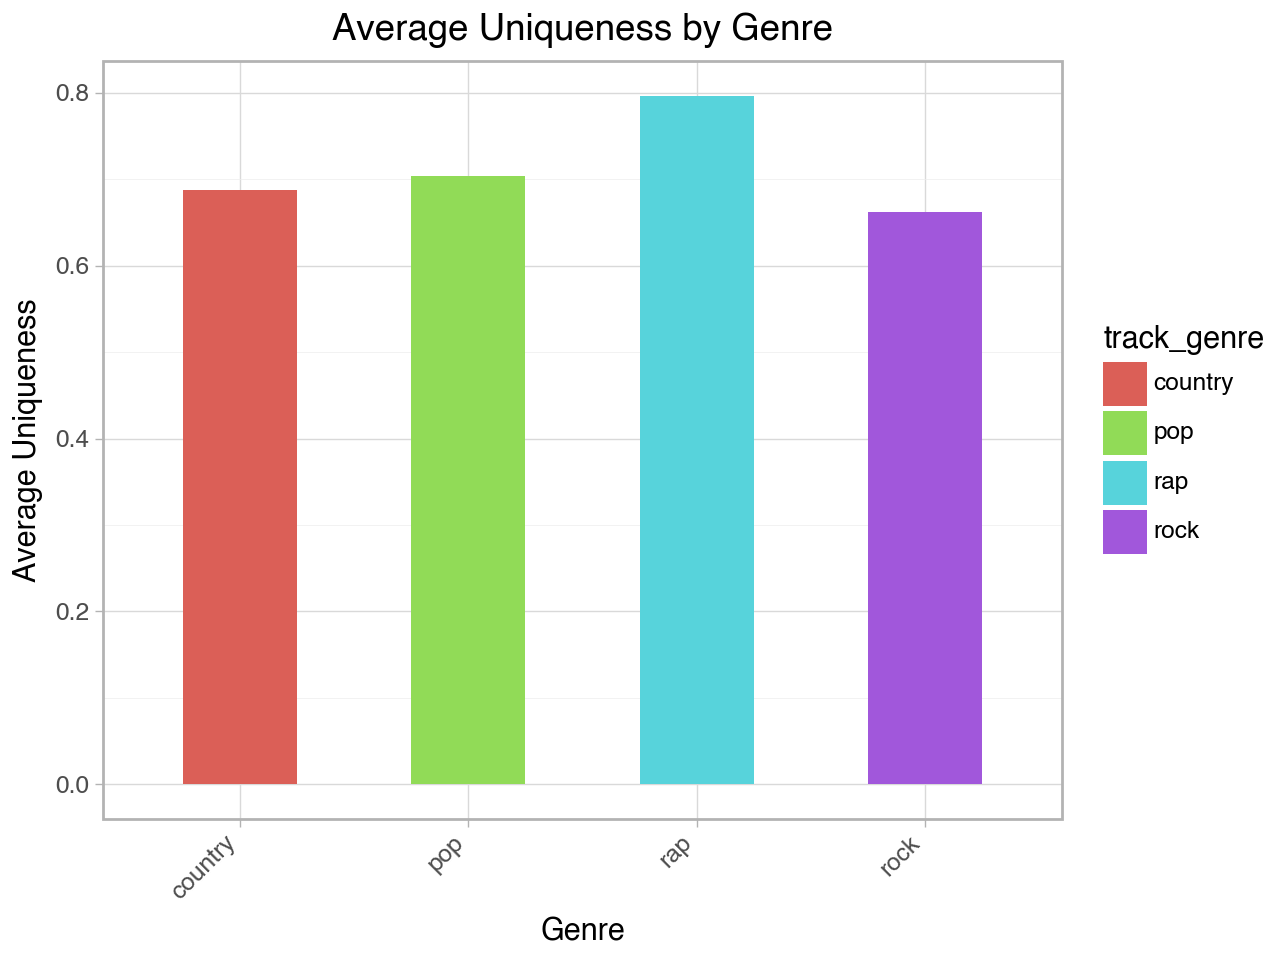

In [32]:
# Create a bar chart for average uniqueness per genre
uniqueness_plot = (
    ggplot(genre_uniqueness, aes(x='track_genre', y='Unique_Line_Percentage', fill='track_genre')) +
    geom_bar(stat='identity', width=0.5) +  # Use identity to use the y values as heights directly
    labs(title='Average Uniqueness by Genre', x='Genre', y='Average Uniqueness') +
    theme_light() +
    theme(axis_text_x=element_text(rotation=45, hjust=1))  # Improve label readability
)
print(uniqueness_plot)